<a href="https://colab.research.google.com/github/ju-liana-rodrigues/estudo-de-caso-score/blob/main/Dados_de_Cr%C3%A9dito_Alem%C3%A3esV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar o dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
column_names = [
    'Checking account status', 'Duration in months', 'Credit history',
    'Purpose', 'Credit amount', 'Savings account/bonds',
    'Employment since', 'Installment rate in percentage of disposable income',
    'Personal status and sex', 'Other debtors / guarantors',
    'Present residence since', 'Property', 'Age in years',
    'Other installment plans', 'Housing',
    'Number of existing credits at this bank', 'Job',
    'Number of people being liable to provide maintenance for', 'Telephone',
    'Foreign worker', 'Credit risk'
]
df = pd.read_csv(url, sep=' ', header=None, names=column_names)

In [2]:
# Separar os dados em treino e teste (30% para teste)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Credit risk'])

# Salvar o dataset de teste em uma planilha Excel
test_df.to_excel('dados_de_teste_alemao.xlsx', index=False)

print(f"Tamanho do dataset de treino: {len(train_df)}")
print(f"Tamanho do dataset de teste: {len(test_df)}")
print("Os dados de teste foram salvos no arquivo 'dados_de_teste_alemao.xlsx'")

# download no Google Colab
from google.colab import files
files.download('dados_de_teste_alemao.xlsx')

Tamanho do dataset de treino: 700
Tamanho do dataset de teste: 300
Os dados de teste foram salvos no arquivo 'dados_de_teste_alemao.xlsx'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# --- Análise Exploratória Inicial (Aplicada ao conjunto de treino para evitar data leakage) ---
print("\n--- Análise Exploratória Inicial (Conjunto de Treino) ---")
print("\nInformações do Dataset de Treino:")
train_df.info()
print("\nPrimeiras 10 linhas do Dataset de Treino:")
print(train_df.head(10))
print("\nEstatísticas descritivas do Dataset de Treino:")
print(train_df.describe())

print("\nValores ausentes e tipos de dados do Dataset de Treino:")
print(train_df.info())
print("\nColunas do Dataset de Treino:", train_df.columns)



--- Análise Exploratória Inicial (Conjunto de Treino) ---

Informações do Dataset de Treino:
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 10 to 749
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Checking account status                                   700 non-null    object
 1   Duration in months                                        700 non-null    int64 
 2   Credit history                                            700 non-null    object
 3   Purpose                                                   700 non-null    object
 4   Credit amount                                             700 non-null    int64 
 5   Savings account/bonds                                     700 non-null    object
 6   Employment since                                          700 non-null    object
 7   Installment rate in percen

In [4]:
# Converter a coluna 'Credit risk' para o tipo object (para garantir o Label Encoding correto)
train_df['Credit risk'] = train_df['Credit risk'].astype('object')
test_df['Credit risk'] = test_df['Credit risk'].astype('object')
print("\nTipo de dado da coluna 'Credit risk' após conversão (Treino):", train_df['Credit risk'].dtype)
print("Tipo de dado da coluna 'Credit risk' após conversão (Teste):", test_df['Credit risk'].dtype)



Tipo de dado da coluna 'Credit risk' após conversão (Treino): object
Tipo de dado da coluna 'Credit risk' após conversão (Teste): object


In [5]:
# --- Pré-processamento ---
print("\n--- Pré-processamento ---")

# Identificar colunas categóricas no conjunto de treino (excluindo a variável alvo)
colunas_categoricas = train_df.select_dtypes(include=['object']).drop('Credit risk', axis=1).columns

# Criar um dicionário para armazenar os codificadores
codificadores = {}

# Aplicar o LabelEncoder para cada coluna categórica nos conjuntos de treino e teste
for coluna in colunas_categoricas:
    codificador = LabelEncoder()
    # Ajustar o codificador com os dados de treino E transformar os dados de treino
    train_df[coluna] = codificador.fit_transform(train_df[coluna].fillna('missing'))
    # Usar o codificador já ajustado para transformar os dados de teste
    test_df[coluna] = codificador.transform(test_df[coluna].fillna('missing'))
    codificadores[coluna] = codificador


--- Pré-processamento ---


In [6]:
# Validar as transformações
print("\nInformações do Dataset de Treino após Label Encoding:")
print(train_df.info())
print("\nInformações do Dataset de Teste após Label Encoding:")
print(test_df.info())

# Separar features e variável alvo nos conjuntos de treino e teste
X_train = train_df.drop(['Credit risk'], axis=1)
y_train = train_df['Credit risk']
X_test = test_df.drop(['Credit risk'], axis=1)
y_test = test_df['Credit risk']

# Escalona os dados numéricos
scaler = StandardScaler()
# Ajustar o scaler apenas com os dados de treino E transformar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)
# Usar o scaler já ajustado para transformar os dados de teste
X_test_scaled = scaler.transform(X_test)


Informações do Dataset de Treino após Label Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 10 to 749
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Checking account status                                   700 non-null    int64 
 1   Duration in months                                        700 non-null    int64 
 2   Credit history                                            700 non-null    int64 
 3   Purpose                                                   700 non-null    int64 
 4   Credit amount                                             700 non-null    int64 
 5   Savings account/bonds                                     700 non-null    int64 
 6   Employment since                                          700 non-null    int64 
 7   Installment rate in percentage of disposable income       700 non

In [7]:
# --- Modelagem ---
print("\n--- Modelagem ---")

# Inicializar os modelos
modelo_arvore = RandomForestClassifier(random_state=42)
modelo_knn = KNeighborsClassifier()
modelo_naive_bayes = GaussianNB()

# Treinar os modelos
y_train_encoded = y_train.astype(int) # Garante que a variável alvo seja numérica para o treinamento
modelo_arvore.fit(X_train_scaled, y_train_encoded)
modelo_knn.fit(X_train_scaled, y_train_encoded)
modelo_naive_bayes.fit(X_train_scaled, y_train_encoded)

# Fazer previsões no conjunto de teste (usando os dados escalonados)
y_pred_arvore = modelo_arvore.predict(X_test_scaled)
y_pred_knn = modelo_knn.predict(X_test_scaled)
y_pred_naive_bayes = modelo_naive_bayes.predict(X_test_scaled)

# Converter y_test para o mesmo tipo de dado das previsões (int)
y_test_encoded = y_test.astype(int)


--- Modelagem ---



--- Avaliação dos Modelos ---

Acurácia da Árvore de Decisão: 0.7633333333333333
Matriz de Confusão da Árvore de Decisão:
 [[195  15]
 [ 56  34]]
Relatório de Classificação da Árvore de Decisão:
               precision    recall  f1-score   support

           1       0.78      0.93      0.85       210
           2       0.69      0.38      0.49        90

    accuracy                           0.76       300
   macro avg       0.74      0.65      0.67       300
weighted avg       0.75      0.76      0.74       300



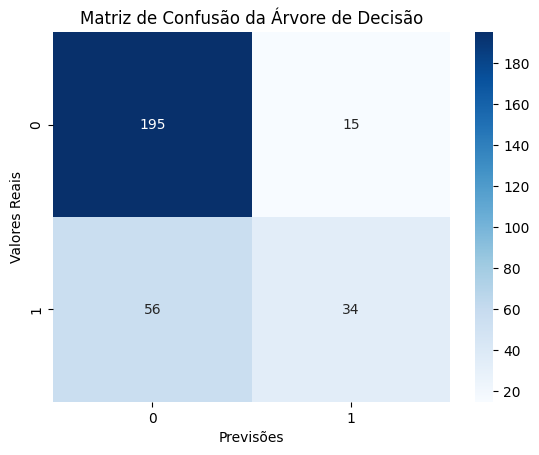

In [8]:
# --- Avaliação dos Modelos ---
print("\n--- Avaliação dos Modelos ---")

# Avaliação da Árvore de Decisão
accuracy_arvore = accuracy_score(y_test_encoded, y_pred_arvore)
print("\nAcurácia da Árvore de Decisão:", accuracy_arvore)
confusion_matrix_arvore = confusion_matrix(y_test_encoded, y_pred_arvore)
print("Matriz de Confusão da Árvore de Decisão:\n", confusion_matrix_arvore)
classification_report_arvore = classification_report(y_test_encoded, y_pred_arvore)
print("Relatório de Classificação da Árvore de Decisão:\n", classification_report_arvore)
sns.heatmap(confusion_matrix_arvore, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão da Árvore de Decisão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


Acurácia do KNN: 0.7366666666666667
Matriz de Confusão do KNN:
 [[182  28]
 [ 51  39]]
Relatório de Classificação do KNN:
               precision    recall  f1-score   support

           1       0.78      0.87      0.82       210
           2       0.58      0.43      0.50        90

    accuracy                           0.74       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300



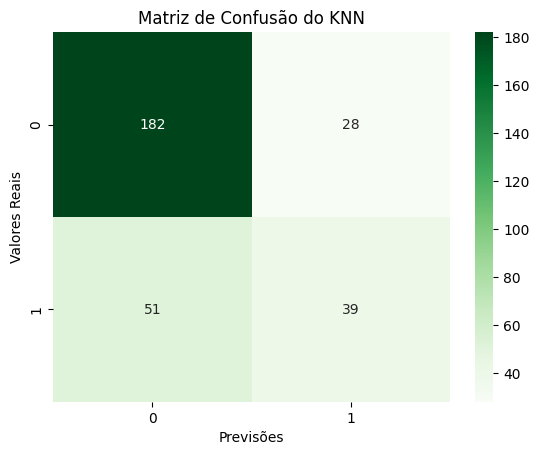

In [9]:
# Avaliação do KNN
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
print("\nAcurácia do KNN:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test_encoded, y_pred_knn)
print("Matriz de Confusão do KNN:\n", confusion_matrix_knn)
classification_report_knn = classification_report(y_test_encoded, y_pred_knn)
print("Relatório de Classificação do KNN:\n", classification_report_knn)
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão do KNN')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


Acurácia do Naive Bayes: 0.68
Matriz de Confusão do Naive Bayes:
 [[147  63]
 [ 33  57]]
Relatório de Classificação do Naive Bayes:
               precision    recall  f1-score   support

           1       0.82      0.70      0.75       210
           2       0.47      0.63      0.54        90

    accuracy                           0.68       300
   macro avg       0.65      0.67      0.65       300
weighted avg       0.71      0.68      0.69       300



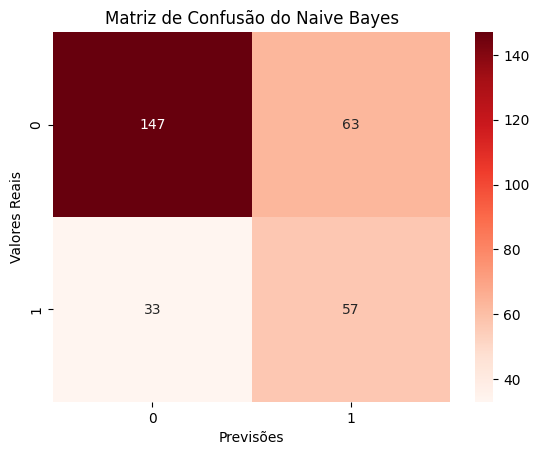

In [10]:
# Avaliação do Naive Bayes
accuracy_naive_bayes = accuracy_score(y_test_encoded, y_pred_naive_bayes)
print("\nAcurácia do Naive Bayes:", accuracy_naive_bayes)
confusion_matrix_naive_bayes = confusion_matrix(y_test_encoded, y_pred_naive_bayes)
print("Matriz de Confusão do Naive Bayes:\n", confusion_matrix_naive_bayes)
classification_report_naive_bayes = classification_report(y_test_encoded, y_pred_naive_bayes)
print("Relatório de Classificação do Naive Bayes:\n", classification_report_naive_bayes)
sns.heatmap(confusion_matrix_naive_bayes, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão do Naive Bayes')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

In [17]:
import pandas as pd
from google.colab import files
import io

print("Por favor, selecione o arquivo Excel (.xlsx é o formato recomendado).")

# Faz o upload do arquivo e armazena os resultados em 'uploaded'
uploaded = files.upload()

# Verifica se algum arquivo foi carregado
if not uploaded:
    print("\nNenhum arquivo foi selecionado para upload.")
else:
    # Pega o nome do primeiro (e geralmente único) arquivo carregado
    # Isso torna o código mais flexível se o nome do arquivo mudar
    nome_do_arquivo_carregado = list(uploaded.keys())[0]

    print(f"\nArquivo '{nome_do_arquivo_carregado}' carregado para o Colab.")

    try:
        # Tenta ler o arquivo Excel usando pandas
        # io.BytesIO transforma os bytes carregados em um objeto de arquivo que pandas pode ler
        df = pd.read_excel(io.BytesIO(uploaded[nome_do_arquivo_carregado]))

        print(f"\nPlanilha '{nome_do_arquivo_carregado}' lida com sucesso como um DataFrame!")
        print("\n--- Primeiras 5 linhas dos dados: ---")
        print(df.head())

        print("\n--- Informações básicas do DataFrame: ---")
        print(f"Número total de linhas: {len(df)}")
        print(f"Número total de colunas: {len(df.columns)}")
        print("\nTipos de dados por coluna:")
        print(df.info(verbose=False, memory_usage="deep")) # Informações mais concisas

    except ValueError as ve:
        # Este erro geralmente ocorre se o arquivo não for um formato Excel válido
        print(f"\nErro: O arquivo '{nome_do_arquivo_carregado}' pode não ser um arquivo Excel válido.")
        print(f"Detalhes do erro: {ve}")
        print("Verifique se o arquivo não está corrompido ou em um formato diferente (ex: CSV renomeado para XLSX).")
    except Exception as e:
        # Captura outros erros inesperados durante a leitura
        print(f"\nOcorreu um erro inesperado ao tentar ler o arquivo '{nome_do_arquivo_carregado}'.")
        print(f"Detalhes do erro: {e}")

Por favor, selecione o arquivo Excel (.xlsx é o formato recomendado).


Saving dados_de_teste_alemao.xlsx to dados_de_teste_alemao (7).xlsx

Arquivo 'dados_de_teste_alemao (7).xlsx' carregado para o Colab.

Planilha 'dados_de_teste_alemao (7).xlsx' lida com sucesso como um DataFrame!

--- Primeiras 5 linhas dos dados: ---
  Checking account status  Duration in months Credit history Purpose  \
0                     A14                  48            A34     A43   
1                     A12                  13            A34     A43   
2                     A13                  36            A32     A43   
3                     A14                  30            A34     A43   
4                     A11                  12            A32     A42   

   Credit amount Savings account/bonds Employment since  \
0           3578                   A65              A75   
1            882                   A61              A72   
2           4473                   A61              A75   
3           2831                   A61              A73   
4           1289    

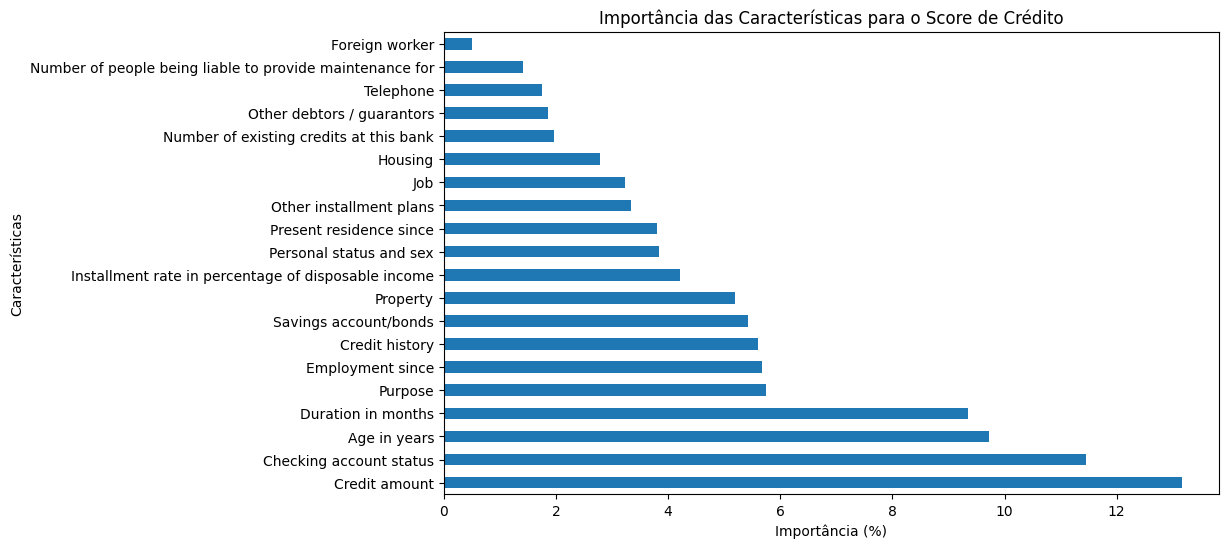

As 5 características mais importantes são:

Credit amount              13.162273
Checking account status    11.447257
Age in years                9.730025
Duration in months          9.346729
Purpose                     5.737207
dtype: float64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtém os nomes das colunas e as importâncias das features
# Corrigido: x_teste foi substituído por X_test
feature_importances = pd.Series(modelo_arvore.feature_importances_, index=X_test.columns)

# Ordena as features por importância
feature_importances = feature_importances.sort_values(ascending=False)

# Calcula a porcentagem de importância
feature_importances = feature_importances * 100

# Cria um gráfico de barras para visualizar as importâncias
plt.figure(figsize=(10,6))
feature_importances.plot(kind='barh')
plt.xlabel('Importância (%)')
plt.ylabel('Características')
plt.title('Importância das Características para o Score de Crédito')
plt.show()

# Imprime as 5 features mais importantes
print("As 5 características mais importantes são:\n")
print(feature_importances.head(5))